<h1>Erik Blood Development Notebook</h1>
<h2>Feature Selection </h2>
<p>In this notebook I will be experimenting with the data set </p>

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


<h2> Read data set, assign features and split into X and y </h2>

In [2]:
df = pd.read_csv("../dataset/1-CombinedDataset.csv", index_col=0)
#.rename(columns={'NASDAQCOM': 'NASDAQ', 'BofA_Yield_Index_PCH': 'BofA_Yeild','CA_Consumer_Price_Index':'CONSUM_PI','FORECLOSURE':'FORE','Average DGS':'DGS'})

In [3]:
df

,DATE,FORECLOSURE,CAUR,Average DGS,DFF,NASDAQCOM,ZHVI,MORT30US,BofA_Yield_Index_PCH,CA_Consumer_Price_Index,CPI STICKY
0,2014-01-01,1388,8.2,2.858095,0.071613,1.92538,1.34214,4.4320,1.07487,235.288,1.821814
1,2014-02-01,513,8.1,2.709474,0.066429,1.08537,1.13758,4.3025,0.87364,235.547,1.789186
2,2014-03-01,597,8.0,2.723333,0.078065,1.83138,0.60021,4.3425,1.04621,236.028,1.820857
3,2014-04-01,317,7.8,2.705238,0.090333,-3.67258,0.22288,4.3375,0.66026,236.468,2.025161
4,2014-05-01,488,7.7,2.559048,0.087097,0.39007,0.08087,4.1920,0.88867,236.918,2.128235
...,...,...,...,...,...,...,...,...,...,...,...
100,2022-05-01,166,4.3,2.898095,0.765484,-11.67996,1.39058,5.2300,-3.22395,291.474,4.975575
101,2022-06-01,181,4.2,3.143333,1.205000,-3.47270,0.29177,5.5220,-2.03930,295.328,5.425963
102,2022-07-01,140,3.9,2.896000,1.675806,1.78399,-0.40032,5.4125,-0.40364,295.271,5.629465
103,2022-08-01,202,4.1,2.897826,2.330000,8.15331,-1.15309,5.2225,3.38678,295.620,5.990544


In [4]:
df['mnth_sin'] = df['DATE'].apply(lambda x: np.sin((int(x[5:7])-1)*(2.*np.pi/12)))
df['mnth_cos'] = df['DATE'].apply(lambda x: np.cos((int(x[5:7])-1)*(2.*np.pi/12)))


df['DATE'] = pd.to_datetime(df['DATE']) 
df['DATE_DELTA'] = (df['DATE'] - df['DATE'].min())  / np.timedelta64(1,'D')

#feature_labels =['DATE_DELTA','CAUR', 'Average DGS', 'DFF', 'NASDAQCOM' ,'ZHVI','BofA_Yield_Index_PCH','CA_Consumer_Price_Index','MORT30US','CPI STICKY', 'mnth_sin','mnth_cos']
## These are the most influential features in the dataset, however leaving them out
## detracts from the random forrest regression ability to forecast foreclosures

feature_labels =['DATE_DELTA', 'DFF', 'NASDAQCOM' ,'CA_Consumer_Price_Index','CPI STICKY', 'mnth_cos']

X = df[feature_labels]
y = df[['FORECLOSURE']]
X

,DATE_DELTA,DFF,NASDAQCOM,CA_Consumer_Price_Index,CPI STICKY,mnth_cos
0,0.0,0.071613,1.92538,235.288,1.821814,1.000000e+00
1,31.0,0.066429,1.08537,235.547,1.789186,8.660254e-01
2,59.0,0.078065,1.83138,236.028,1.820857,5.000000e-01
3,90.0,0.090333,-3.67258,236.468,2.025161,6.123234e-17
4,120.0,0.087097,0.39007,236.918,2.128235,-5.000000e-01
...,...,...,...,...,...,...
100,3042.0,0.765484,-11.67996,291.474,4.975575,-5.000000e-01
101,3073.0,1.205000,-3.47270,295.328,5.425963,-8.660254e-01
102,3103.0,1.675806,1.78399,295.271,5.629465,-1.000000e+00
103,3134.0,2.330000,8.15331,295.620,5.990544,-8.660254e-01


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=55)
#X_train = preprocessing.scale(X_train)
X_train.shape


NameError: name 'column_or_1d' is not defined

/home/shram/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature 0: 8.830594
Feature 1: 1.857572
Feature 2: 0.742157
Feature 3: 5.871636
Feature 4: 1.314657
Feature 5: 16.462010


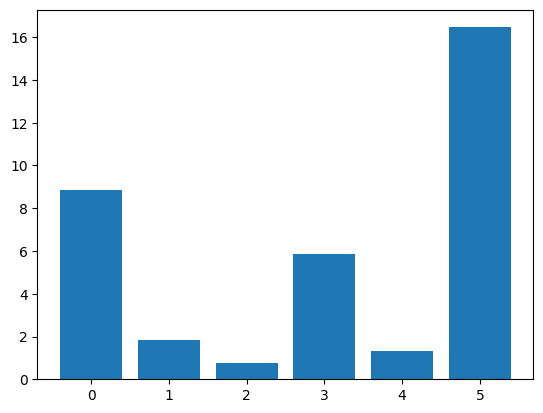

In [6]:
# example of correlation feature selection for numerical data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(0,len(fs.scores_))], fs.scores_ )
pyplot.show()


In [14]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 9)
regressor.fit(X_train,y_train)

/tmp/ipykernel_28620/969330273.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)


RandomForestRegressor(random_state=9)

In [15]:
y_pred = regressor.predict(X_test)
y_pred


array([ 256.1 ,   87.11,  195.65,  174.32,   84.38, 1466.64,  167.85,
         71.67,  316.45,   98.94,  525.48,  167.53,  480.21,  405.  ,
        385.43,   83.6 ,  419.29,  133.39,  327.12,  202.91,   64.66,
         86.73,  616.54,  102.04,  493.03,  133.91,   73.48])

In [16]:
r2_score(y_test,y_pred)

0.5535166135039431

In [17]:
print(X_test)

     DATE_DELTA       DFF  NASDAQCOM  CA_Consumer_Price_Index  CPI STICKY  \
28        851.0  0.365161   -2.12447                  239.557    2.571157   
38       1155.0  0.786129    1.73924                  243.892    2.453344   
103      3134.0  2.330000    8.15331                  295.620    5.990544   
100      3042.0  0.765484  -11.67996                  291.474    4.975575   
89       2708.0  0.078000    4.28688                  270.955    2.604632   
36       1096.0  0.649677    2.73977                  243.618    2.661562   
102      3103.0  1.675806    1.78399                  295.271    5.629465   
47       1430.0  1.301613    1.37867                  247.805    2.125472   
17        516.0  0.129000    0.86710                  237.657    2.114733   
85       2588.0  0.075714    4.17695                  263.346    1.520784   
5         151.0  0.095667    4.77259                  237.231    2.143341   
67       2038.0  2.125806   -3.59104                  256.179    2.633395   

<h2>Plot results</h2>

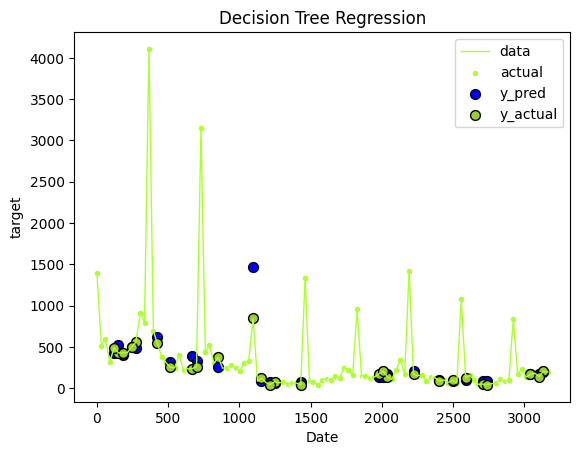

In [18]:
import matplotlib.pyplot as plt

# Plot the results
plt.figure()
plt.plot(X['DATE_DELTA'], y, color="greenyellow", lw=1, label="data")
plt.scatter(X['DATE_DELTA'], y,s=25, edgecolor="white", c="greenyellow", label="actual")
plt.scatter(X_test['DATE_DELTA'], y_pred,s=50, edgecolor="black", c="blue", label="y_pred")
plt.scatter(X_test['DATE_DELTA'], y_test, s=50, edgecolor="black", c="yellowgreen", label="y_actual")

plt.xlabel("Date")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()